In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [5]:
X.shape  # 569 data points, 30 columns

(569, 30)

In [6]:
y.shape  # 569 targets for each X

(569,)

# Process Data

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Encode Categorical Data into binary

In [8]:
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)  # Map Malignant as 1, Benign as 0

### Split Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### Data Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define model & Train

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [12]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(30,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 2s 8ms/step - loss: 0.6979 - accuracy: 0.5879
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6299 - accuracy: 0.6777
Epoch 3/150
6/6 [==============================] - 0s 9ms/step - loss: 0.5596 - accuracy: 0.7812
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.7988
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.8516
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 0.4212 - accuracy: 0.8848
Epoch 7/150
6/6 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8926
Epoch 8/150
6/6 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.9082
Epoch 9/150
6/6 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.9199
Epoch 10/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2907 - accuracy: 0.9180
Epoch 11/150
6/6 [===========

# Model Evaluation with Test Data

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 1.0000


[0.00485524907708168, 1.0]

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred = model.predict(X_test) > 0.5

In [18]:
cm = confusion_matrix(y_test, y_pred)

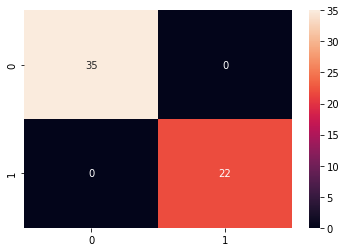

In [19]:
sns.heatmap(cm, annot=True)